# PREDICT CAR PRICES USING MACHINE LEARNING 

We are going to predict a car's market price using its attributes. The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more
https://archive.ics.uci.edu/ml/datasets/automobile(link for the documentation of dataset)

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

%matplotlib inline
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars=pd.read_csv('imports-85.data',names=cols)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [2]:
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols]

In [3]:
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


## Data Cleaning

In [4]:
numeric_cars = numeric_cars.replace('?', np.nan)
# replaced '?' with nan values in normalized-losses column

In [5]:
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
numeric_cars = numeric_cars.astype('float')
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [7]:
# Replace missing values in  columns using column means.
numeric_cars = numeric_cars.dropna(subset=['price'])

In [8]:
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [9]:
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

In [10]:
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [11]:
# Normalize all columnns to range from 0 to 1 except the target column.
numeric_cars = numeric_cars.fillna(numeric_cars.mean)
price_col = numeric_cars['price']
numeric_cars = (numeric_cars-numeric_cars.min())/(numeric_cars.max()-numeric_cars.min())
numeric_cars['price']=price_col
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


##  Univariate k-nearest neighbors models

In [12]:
def knn_train_test(train_col,target_col,df):
    knn=KNeighborsRegressor()
    np.random.seed(1)
    
    # randomize order of rows in dataframe
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Know the exact number of rows to divide the dataframe for testing and training
    number_row = int(len(rand_df)/2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_set = rand_df.iloc[:number_row]
    test_set = rand_df.iloc[number_row:]
    
    # use fit 
    knn.fit(train_set[[train_col]],train_set[target_col])
    
    # make predictions using model
    predictions = knn.predict(test_set[[train_col]])
    
    # calculate and return MSE
    mse = mean_squared_error(test_set[target_col],predictions)
    
    # calculate RMSE
    rmse = mse**(1/2)
    return rmse

train_cols = numeric_cars.columns.drop('price')
rmse_values={}
for i in train_cols:
    if i!='price':
        rmse_values[i]=knn_train_test(i,'price',numeric_cars)
# convert dict to series
rmse_values = pd.Series(rmse_values)
rmse_values.sort_values()

engine-size          3238.462830
horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

As you can see above the column engine-size gives us the lowest RMSE value

In [13]:
k=[1,2,3,4,5,6,7,8,9]
def knn_train_test(train_col,target_col,df,k):
    k_rmse_values={}
    # iterate through k values
    for i in k:
        knn=KNeighborsRegressor(n_neighbors=i)
        np.random.seed(1)

        # randomize order of rows in dataframe
        shuffled_index = np.random.permutation(df.index)
        rand_df = df.reindex(shuffled_index)

        # Know the exact number of rows to divide the dataframe for testing and training
        number_row = int(len(rand_df)/2)

        # Select the first half and set as training set.
        # Select the second half and set as test set.
        train_set = rand_df.iloc[:number_row]
        test_set = rand_df.iloc[number_row:]

        # use fit 
        knn.fit(train_set[[train_col]],train_set[target_col])

        # make predictions using model
        predictions = knn.predict(test_set[[train_col]])

        # calculate and return MSE
        mse = mean_squared_error(test_set[target_col],predictions)

        # calculate RMSE
        rmse = mse**(1/2)
        k_rmse_values[i]=rmse
    return k_rmse_values

train_cols = numeric_cars.columns.drop('price')
rmse_values={}
for i in train_cols:
    if i!='price':
        rmse_values[i]=knn_train_test(i,'price',numeric_cars,k)

In [14]:
rmse_col_values = pd.DataFrame(rmse_values)
rmse_col_values

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg
1,7846.750605,4493.734069,4628.455501,4559.257298,8904.046456,5264.290231,3258.486106,8602.588485,9116.495955,8087.205347,4170.054848,9511.480068,5901.143574,6025.594967
2,6995.131630,4442.179883,5009.409197,4362.596087,8021.049662,5550.551865,2961.402094,7036.080559,7369.025511,7076.974329,3803.239548,9737.491858,5031.938411,5168.178372
3,7500.569812,5120.161506,5129.835821,4606.413692,8277.609643,5022.318012,2840.562806,6984.239489,7338.684670,7375.063686,4020.849263,8537.550900,4646.746409,4617.305020
4,7021.331493,5487.831706,5191.789946,4509.391429,8213.693382,4742.881546,3138.595303,6796.379776,7665.714154,6951.352201,3907.843870,7976.758886,4680.486314,4411.165566
5,7330.197653,5461.553998,5427.200961,4704.482590,8144.441043,4401.118255,3238.462830,6780.627785,8006.529545,6610.812153,4037.037713,7697.459696,4766.422505,4630.026799
6,7673.178940,5450.864836,5353.367715,4594.594316,8010.061905,4418.368810,3443.540179,6935.259319,7759.328504,6631.565127,4234.914426,7477.286040,4979.523811,4578.285017
7,7756.421586,5448.107051,5313.427721,4571.485046,7679.598124,4330.608104,3563.086774,6878.097966,7803.937797,6732.801283,4353.811860,7510.294160,5232.523034,4796.061440
8,7714.914085,5686.650799,5408.074004,4588.059576,7564.539545,4491.429833,3670.755243,6766.961151,7906.197117,6964.065927,4391.779418,7329.572355,5332.175643,5123.749584
9,7688.096097,5738.405685,5383.054515,4652.914172,7811.036063,4632.044474,3831.824415,6866.808502,7735.554366,7024.485525,4515.135617,7340.041341,5465.209493,5278.358057


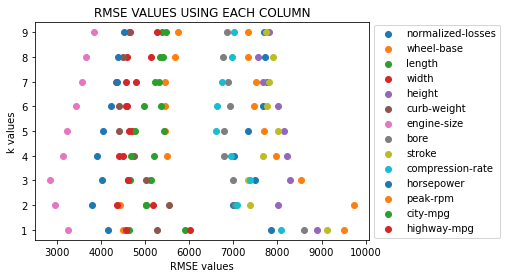

In [15]:
for i in train_cols:
    plt.scatter(x=rmse_col_values[i],y=k)
    plt.xlabel('RMSE values')
    plt.ylabel('k values')
    plt.legend(train_cols,loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('RMSE VALUES USING EACH COLUMN')
plt.show()

## Multivariate Model

In [16]:
avg_rmse = rmse_col_values.mean().sort_values()
avg_rmse = avg_rmse.index
avg_rmse
# Average RMSE values

Index(['engine-size', 'horsepower', 'width', 'curb-weight', 'highway-mpg',
       'city-mpg', 'length', 'wheel-base', 'compression-rate', 'bore',
       'normalized-losses', 'stroke', 'height', 'peak-rpm'],
      dtype='object')

In [17]:
k=[5]
def knn_train_test(train_col,target_col,df,k):
    k_rmse_values={}
    # iterate through k values
    for i in k:
        knn=KNeighborsRegressor(n_neighbors=i)
        np.random.seed(1)

        # randomize order of rows in dataframe
        shuffled_index = np.random.permutation(df.index)
        rand_df = df.reindex(shuffled_index)

        # Know the exact number of rows to divide the dataframe for testing and training
        number_row = int(len(rand_df)/2)

        # Select the first half and set as training set.
        # Select the second half and set as test set.
        train_set = rand_df.iloc[:number_row]
        test_set = rand_df.iloc[number_row:]

        # use fit 
        knn.fit(train_set[train_col],train_set[target_col])

        # make predictions using model
        predictions = knn.predict(test_set[train_col])

        # calculate and return MSE
        mse = mean_squared_error(test_set[target_col],predictions)

        # calculate RMSE
        rmse = mse**(1/2)
        k_rmse_values[i]=rmse
    return k_rmse_values

ans=[]
for i in range(2,7):
    t=knn_train_test(avg_rmse[:i],'price',numeric_cars,k)
    ans.append(str(i)+' '+'best features'+' '+str(t))
    
    

In [18]:
ans

['2 best features {5: 2949.8817277180374}',
 '3 best features {5: 3580.7376651928435}',
 '4 best features {5: 3487.340917327035}',
 '5 best features {5: 3410.2170133901805}',
 '6 best features {5: 3416.5360733634966}']

## Hyperparameter Values

Lets vary the hyperparameter value from 1 to 25 and plot the resulting RMSE values for Top 3 models

In [19]:
k=[i for i in range(1,26)]
def knn_train_test(train_col,target_col,df,k):
    k_rmse_values={}
    # iterate through k values
    for i in k:
        knn=KNeighborsRegressor(n_neighbors=i)
        np.random.seed(1)

        # randomize order of rows in dataframe
        shuffled_index = np.random.permutation(df.index)
        rand_df = df.reindex(shuffled_index)

        # Know the exact number of rows to divide the dataframe for testing and training
        number_row = int(len(rand_df)/2)

        # Select the first half and set as training set.
        # Select the second half and set as test set.
        train_set = rand_df.iloc[:number_row]
        test_set = rand_df.iloc[number_row:]

        # use fit 
        knn.fit(train_set[train_col],train_set[target_col])

        # make predictions using model
        predictions = knn.predict(test_set[train_col])

        # calculate and return MSE
        mse = mean_squared_error(test_set[target_col],predictions)

        # calculate RMSE
        rmse = mse**(1/2)
        k_rmse_values[i]=rmse
    return k_rmse_values

ans={}
for i in range(2,7):
    t=knn_train_test(avg_rmse[:i],'price',numeric_cars,k)
    ans['{} best features'.format(i)]=knn_train_test(train_cols[:i],'price',numeric_cars,k)
    
ans

{'2 best features': {1: 5537.5307924405915,
  2: 5026.689387954093,
  3: 5485.55136607789,
  4: 5430.220749927717,
  5: 5722.396953884079,
  6: 5584.267198168355,
  7: 5542.076778482017,
  8: 5688.784459994159,
  9: 5801.744333355258,
  10: 5847.486513777683,
  11: 5923.661915570155,
  12: 6020.23557185444,
  13: 6148.351639643203,
  14: 6239.731740910418,
  15: 6232.1725735273585,
  16: 6296.826313440383,
  17: 6332.3491233225905,
  18: 6303.518024193211,
  19: 6270.90462314214,
  20: 6340.9297825752255,
  21: 6300.742780665612,
  22: 6351.042307399088,
  23: 6398.651044953251,
  24: 6425.60547379208,
  25: 6465.057821828674},
 '3 best features': {1: 4821.824377425279,
  2: 5280.086786246702,
  3: 5385.844852841372,
  4: 5594.175798606781,
  5: 5461.074398480813,
  6: 5281.184630921891,
  7: 5150.728315239465,
  8: 5309.388905191029,
  9: 5421.194018467675,
  10: 5543.091854651961,
  11: 5566.32927948533,
  12: 5626.806977181383,
  13: 5667.619403488076,
  14: 5692.006770318193,
  15:

Text(0, 0.5, 'RMSE')

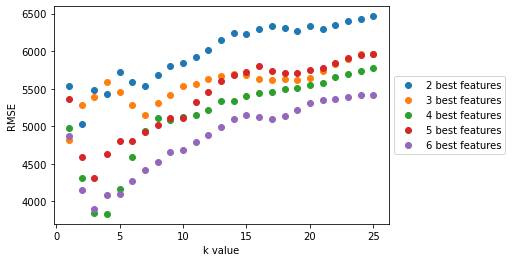

In [20]:
for k,v in ans.items():
    x = list(v.keys())
    y = list(v.values())
    plt.scatter(x,y)
    plt.legend(ans.keys(),loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('k value')
plt.ylabel('RMSE')


As you can see above the 4 best featured model at k = 3 and 4 are having low RMSE values so it is better to choose that model for predicting the prices

In [21]:
def price_predict(train_col,target_col,df,k):
    
    knn=KNeighborsRegressor(n_neighbors=i)
    np.random.seed(1)

    # randomize order of rows in dataframe
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Know the exact number of rows to divide the dataframe for testing and training
    number_row = int(len(rand_df)/2)

    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_set = rand_df.iloc[:number_row]
    test_set = rand_df.iloc[number_row:]

    # use fit 
    knn.fit(train_set[train_col],train_set[target_col])

    # make predictions using model
    predictions = knn.predict(test_set[train_col])
    
    return predictions
prices = price_predict(train_cols[:3],'price',numeric_cars,5)
prices

array([ 9994.83333333, 18425.33333333,  7037.66666667,  7331.        ,
        7903.        ,  8122.66666667,  8727.66666667, 23732.5       ,
       10032.5       ,  8172.        , 19414.16666667, 16953.83333333,
       15847.33333333,  9200.5       , 10209.        , 16953.83333333,
       20756.83333333, 10209.        , 21098.33333333,  7903.        ,
       10360.66666667, 18652.16666667, 12509.16666667,  7037.66666667,
        7852.        ,  7258.16666667, 10360.66666667, 21107.66666667,
        7903.        ,  6298.83333333, 19323.33333333,  6345.        ,
        9235.33333333,  9200.5       , 13037.16666667, 15847.33333333,
        7685.16666667, 14305.83333333, 19323.33333333, 10775.66666667,
       16953.83333333,  8122.66666667,  6298.83333333, 24612.5       ,
       13422.16666667, 20756.83333333, 22549.        ,  8127.        ,
       11283.33333333, 16953.83333333,  9235.33333333, 10209.        ,
        7685.16666667,  7037.66666667,  9235.33333333,  7685.16666667,
      